# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.295  1  0.481 0.489 0.003   
                             age        0.220  1  0.359 0.550 0.002   
                             Kiel       2.570  1  4.195 0.042 0.021   
                             Magdeburg  5.378  1  8.778 0.003 0.044   
                             Sweden     8.869  1 14.475 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.025  1  0.026 0.872 0.000   
                             age        0.691  1  0.717 0.398 0.004   
                             Kiel       0.001  1  0.001 0.980 0.000   
                             Magdeburg  2.094  1  2.171 0.142 0.011   
                             Sweden    18.694  1 19.388 0.000 0.092   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.311  0.638    False  
                             age               0.260  0.686    False  
                             Kiel              1.378  0.106    False  
                             Magdeburg         2.464  0.014     True  
                             Sweden            3.719  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.060  0.927    False  
                             age               0.400  0.559    False  
                             Kiel              0.009  0.989    False  
                             Magdeburg         0.847  0.273    False  
                             Sweden            4.751  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.949  1  6.057 0.015 0.031   
                             age        0.018  1  0.116 0.734 0.001   
                             Kiel       0.453  1  2.893 0.091 0.015   
                             Magdeburg  0.823  1  5.253 0.023 0.027   
                             Sweden     2.376  1 15.158 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.132  1  4.141 0.043 0.021   
                             age        0.567  1  1.101 0.295 0.006   
                             Kiel       2.387  1  4.636 0.033 0.024   
                             Magdeburg  2.638  1  5.124 0.025 0.026   
                             Sweden    17.171  1 33.354 0.000 0.149   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.832  0.038     True  
                             age               0.134  0.818    False  
                             Kiel              1.043  0.169    False  
                             Magdeburg         1.638  0.055    False  
                             Sweden            3.865  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.364  0.092    False  
                             age               0.530  0.425    False  
                             Kiel              1.487  0.073    False  
                             Magdeburg         1.607  0.058    False  
                             Sweden            7.513  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.015         1.832  0.038     True   
                             age       0.734         0.134  0.818    False   
                             Kiel      0.091         1.043  0.169    False   
                             Magdeburg 0.023         1.638  0.055    False   
                             Sweden    0.000         3.865  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.043         1.364  0.092    False   
                             age       0.295         0.530  0.425    False   
                             Kiel      0.033         1.487  0.073    False   
                             Magdeburg 0.025         1.607  0.058    False   
                             Sweden    0.000         7.513  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.489         0.311  0.638    False  
                             age       0.550         0.260  0.686    False  
                             Kiel      0.042         1.378  0.106    False  
                             Magdeburg 0.003         2.464  0.014     True  
                             Sweden    0.000         3.719  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.872         0.060  0.927    False  
                             age       0.398         0.400  0.559    False  
                             Kiel      0.980         0.009  0.989    False  
                             Magdeburg 0.142         0.847  0.273    False  
                             Sweden    0.000         4.751  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.247     0.279     0.260         2.473     0.336
std       0.294         6.102     0.320     0.301         5.286     0.329
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.404     0.002     0.004         0.337     0.015
50%       0.062         1.206     0.124     0.125         0.903     0.250
75%       0.394         3.275     0.525     0.461         2.419     0.614
max       1.000        86.092     1.000     0.999       145.130     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.015         1.832   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.464   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.292         0.534   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.596   
A0A075B6H7                                         AD     0.001         3.135   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.191         0.719   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.661         0.180   
S4R3U6                                             AD     0.043         1.364   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.038     True   
A0A024R0T9;K7ER74;P02655                           AD      0.077    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.422    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.378    False   
A0A075B6H7                                         AD      0.003     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.304    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.759    False   
S4R3U6                                             AD      0.092    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.489         0.311   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.443   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.096         1.016   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.518         0.285   
A0A075B6H7                                         AD     0.134         0.872   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.042         1.377   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.353         0.452   
S4R3U6                                             AD     0.872         0.060   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.638    False  
A0A024R0T9;K7ER74;P02655                           AD      0.095    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.204    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.662    False  
A0A075B6H7                                         AD      0.263    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.236         1.604     0.297     0.254         1.390     0.337
std       0.291         1.847     0.313     0.291         1.599     0.315
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.006         0.400     0.019     0.013         0.364     0.042
50%       0.087         1.058     0.164     0.133         0.876     0.261
75%       0.398         2.190     0.529     0.433         1.888     0.592
max       0.997        20.462     0.998     0.999        19.861     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,945,1044


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.015         1.832  0.038   
A0A024R0T9;K7ER74;P02655                           0.034         1.464  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.292         0.534  0.422   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.254         0.596  0.378   
A0A075B6H7                                         0.001         3.135  0.003   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.191         0.719  0.304   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.661         0.180  0.759   
S4R3U6                                             0.043         1.364  0.092   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.489   
A0A024R0T9;K7ER74;P02655                              False 0.036   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.096   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.518   
A0A075B6H7                                             True 0.134   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.042   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.353   
S4R3U6                                                False 0.872   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.311  0.638   
A0A024R0T9;K7ER74;P02655                                   1.443  0.095   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.016  0.204   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.285  0.662   
A0A075B6H7                                                 0.872  0.263   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.377  0.107   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.452  0.515   
S4R3U6                                                     0.060  0.927   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    894
CF (yes) - PI (yes)   326
CF (yes) - PI (no)    150
CF (no)  - PI (yes)    51
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.015         1.832  0.038   
A0A075B6H7                                         0.001         3.135  0.003   
A0A075B6I0                                         0.001         3.197  0.002   
A0A075B6J9                                         0.015         1.833  0.037   
A0A075B6R2                                         0.002         2.676  0.007   
...                                                  ...           ...    ...   
Q9P1W8;Q9P1W8-2;Q9P1W8-4                           0.019         1.717  0.047   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.305         0.516  0.435   
Q9UP79                                             0.000         4.860  0.000   
Q9UQ52                                             0.000         3.384  0.002   
Q9Y6C2                                             0.019         1.717  0.047   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.489   
A0A075B6H7                                             True 0.134   
A0A075B6I0                                             True 0.018   
A0A075B6J9                                             True 0.080   
A0A075B6R2                                             True 0.361   
...                                                     ...   ...   
Q9P1W8;Q9P1W8-2;Q9P1W8-4                               True 0.594   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False 0.000   
Q9UP79                                                 True 0.429   
Q9UQ52                                                 True 0.078   
Q9Y6C2                                                 True 0.904   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.311  0.638   
A0A075B6H7                                                 0.872  0.263   
A0A075B6I0                                                 1.734  0.056   
A0A075B6J9                                                 1.096  0.177   
A0A075B6R2                                                 0.443  0.523   
...                                                          ...    ...   
Q9P1W8;Q9P1W8-2;Q9P1W8-4                                   0.226  0.724   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         3.629  0.001   
Q9UP79                                                     0.368  0.588   
Q9UQ52                                                     1.110  0.172   
Q9Y6C2                                                     0.044  0.945   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A075B6H7                                            False        91  
A0A075B6I0                                            False       194  
A0A075B6J9                                            False       156  
A0A075B6R2                                            False       164  
...                                                     ...       ...  
Q9P1W8;Q9P1W8-2;Q9P1W8-4                              False        57  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True       115  
Q9UP79                                                False       135  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.038,0.638,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.077,0.095,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.422,0.204,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.378,0.662,196,CF (no) - PI (no)
A0A075B6H7,0.003,0.263,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.304,0.107,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q8N9I0,0.010,0.984,141,CF (yes) - PI (no),0.974
Q9NPH3;Q9NPH3-2;Q9NPH3-5,0.023,0.986,186,CF (yes) - PI (no),0.962
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.960,134,CF (yes) - PI (no),0.960
Q9Y6C2,0.047,0.945,119,CF (yes) - PI (no),0.898
O15197;O15197-3,0.008,0.900,104,CF (yes) - PI (no),0.892
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.058,197,CF (yes) - PI (no),0.011
K7ERI9;P02654,0.052,0.042,196,CF (no) - PI (yes),0.011
Q9NX62,0.045,0.056,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


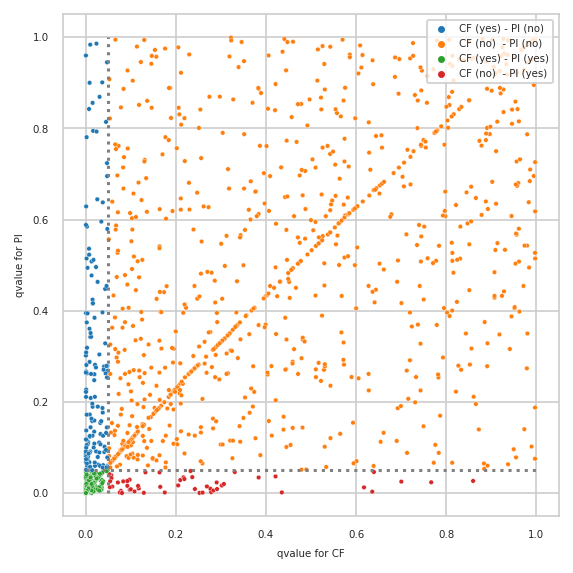

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


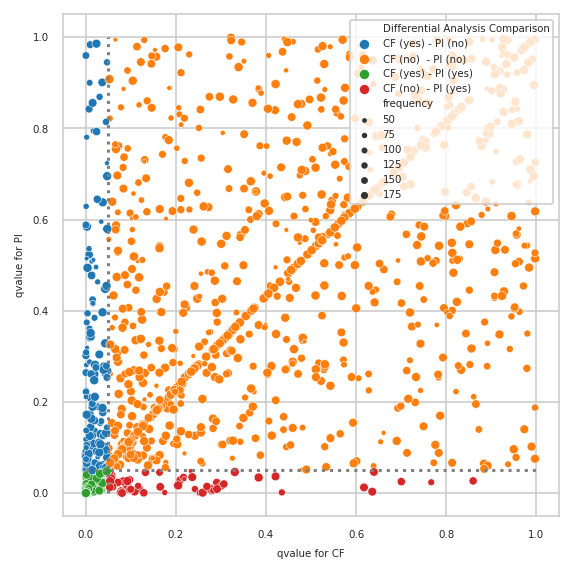

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out